In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "./KopubDotumMedium.ttf"

C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) 

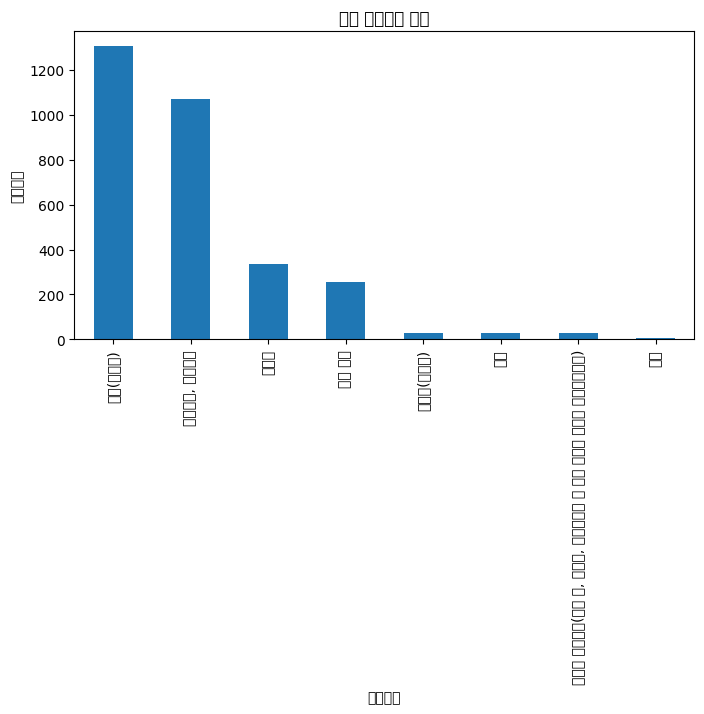

findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) m

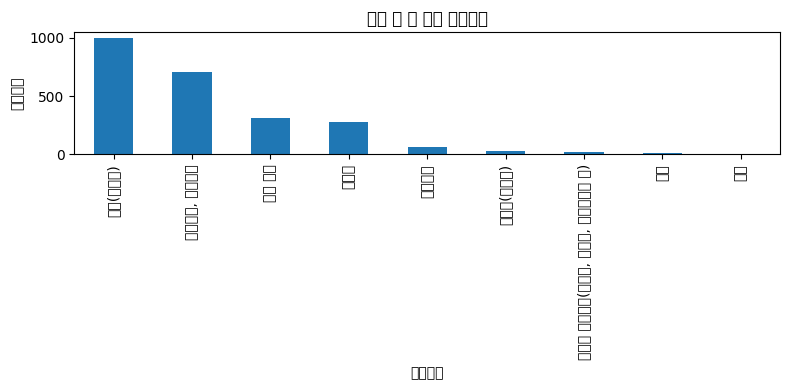

findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missi

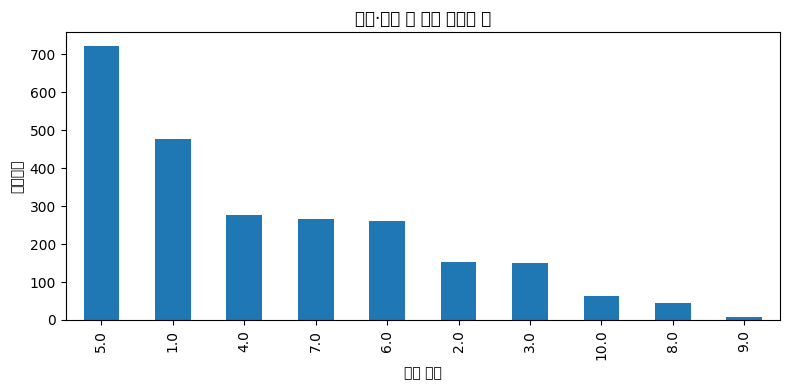

findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family './KopubDotumMedium.ttf' not found.
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\190465003.py:31: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users

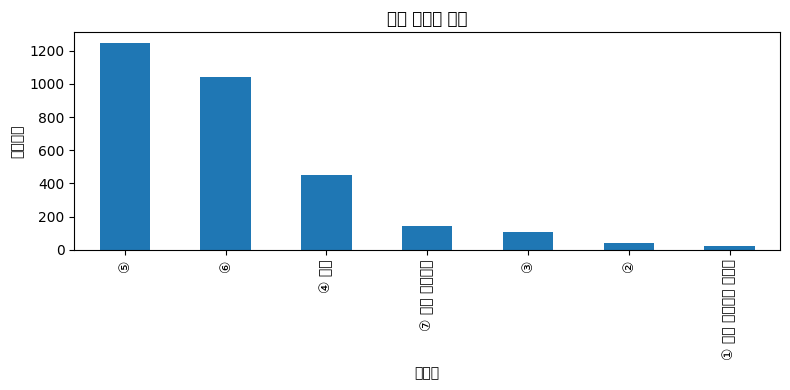

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def load_survey_data(excel_path: Path) -> pd.DataFrame:
    df_raw = pd.read_excel(excel_path, header=None)
    code_row = df_raw.iloc[1]          # 두 번째 행: 코드명
    df = df_raw.iloc[2:].reset_index(drop=True)  # 응답 데이터만 남김
    df.columns = code_row              # 컬럼명을 코드명으로 지정
    return df

def load_codebook(json_path: Path) -> dict:
    with open(json_path, "r", encoding="utf-8") as f:
        return json.load(f)

def map_response_codes(series: pd.Series, codebook_entry: dict) -> pd.Series:
    mapping = {}
    for code, value in codebook_entry.get("보기", {}).items():
        label = value.get("내용", value) if isinstance(value, dict) else value
        mapping[str(code)] = label
    return series.astype(str).map(mapping).fillna(series)

def plot_value_counts(series: pd.Series, title: str, xlabel: str, ylabel: str) -> None:
    counts = series.value_counts().sort_values(ascending=False)
    plt.figure(figsize=(8, 4))
    counts.plot(kind="bar")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# 파일 경로를 자신의 환경에 맞게 수정하세요.
excel_path = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")

# 데이터 및 코드북 로드
df = load_survey_data(excel_path)
codebook = load_codebook(codebook_path)

# 문항별 라벨 매핑 및 시각화 예시
df["Q16_label"]   = map_response_codes(df["Q16"],   codebook["Q16"])
df["Q15_2_label"] = map_response_codes(df["Q15_2"], codebook["Q15_2"])
df["Q15_5_label"] = map_response_codes(df["Q15_5"], codebook["Q15_5"])
df["Q18_bus"]     = map_response_codes(df["Q18a1"], codebook["Q18a1"])

plot_value_counts(df["Q16_label"],   "평소 이동수단 분포",       "이동수단", "응답자수")
plot_value_counts(df["Q15_2_label"], "통근 시 주 이용 교통수단", "교통수단", "응답자수")
plot_value_counts(df["Q15_5_label"], "통근·통학 시 가장 불편한 점", "불편 요인", "응답자수")
plot_value_counts(df["Q18_bus"],     "버스 만족도 분포",         "만족도",   "응답자수")

In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd
import json
import matplotlib.pyplot as plt
from pathlib import Path

# 엑셀 데이터와 코드북 JSON 경로 설정
excel_path = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")

# 엑셀 파일 읽기 (헤더가 두 줄인 구조를 처리)
df_raw = pd.read_excel(excel_path, header=None)
code_row = df_raw.iloc[1]                  # 두 번째 행: 코드명 (Q15, Q16 등)
df = df_raw.iloc[2:].reset_index(drop=True)
df.columns = code_row                      # 컬럼명을 코드명으로 지정

# 코드북 로드
with open(codebook_path, "r", encoding="utf-8") as f:
    codebook = json.load(f)

df.head()  # 데이터 확인

1,PID,H0a1,H0a2,H0a3,gender,birth,H0a4,H0a5n1,H0a5opn1,H0a9n1,...,SCORE1,SCORE2,MQ1,MQ2,MQ4,MHQ1,MHQ2,MHQ4,wg,ws
0,29715,1,1,3,1,1992,1,1,NaN,1,...,2,1,4,5.6,4.6,50,56,60.0,241,0.729643
1,51295,1,2,1,2,1981,4,2,NaN,1,...,2,3,4.857143,8,5.3,64.285714,80,71.666667,202.384615,0.612732
2,52982,1,2,2,1,1977,5,1,NaN,1,...,2,3,4.571429,5.6,5.1,59.52381,56,68.333333,212,0.641843
3,54416,1,2,2,1,1975,4,2,NaN,2,...,2,3,3.285714,7.2,4.1,38.095238,72,51.666667,318.416667,0.964027
4,64244,1,2,3,1,1991,3,6,NaN,1,...,2,3,4,6.6,5.1,50,66,68.333333,390.285714,1.181615


In [ ]:
import pandas as pd
import json
from pathlib import Path

# 파일 경로 설정: 자신의 환경에 맞게 수정하세요.
excel_path = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")

# 설문 응답 데이터 불러오기 (헤더 두 줄 제거 후 코드명 사용)
df_raw = pd.read_excel(excel_path, header=None)
code_row = df_raw.iloc[1]  # 두 번째 행: 코드명
df = df_raw.iloc[2:].reset_index(drop=True)
df.columns = code_row

# 코드북 불러오기
with open(codebook_path, "r", encoding="utf-8") as f:
    codebook = json.load(f)

In [ ]:
def map_response_codes(series: pd.Series, codebook_entry: dict) -> pd.Series:
    """
    설문 응답 코드(숫자)를 코드북의 한글 라벨로 변환합니다.
    """
    mapping = {}
    for code, value in codebook_entry.get("보기", {}).items():
        label = value.get("내용", value) if isinstance(value, dict) else value
        mapping[str(code)] = label
    return series.astype(str).map(mapping).fillna(series)

In [9]:
# 교통 관련 설문 코드 리스트 (필요시 수정/추가)
transport_codes = [
    "Q15", "Q15_2", "Q15_5", "Q16",
    "Q17a1", "Q17a2", "Q17a3", "Q17a4", "Q17a5", "Q17a6",
    "Q18a1", "Q18a2", "Q18a3", "Q18a4", "Q18a5", "Q18a6",
    "Q19a1", "Q19a2", "Q15_4"
]

# 교통 관련 데이터만 추출
df_transport = df[transport_codes].copy()

# 각 문항의 숫자 코드를 라벨로 변환
for code in transport_codes:
    if code in codebook:
        df_transport[code] = map_response_codes(df_transport[code], codebook[code])
    else:
        print(f"{code}: 코드북에 정의되지 않았습니다.")

df_transport.head()

C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\1018065114.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\1018065114.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\1018065114.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects

1,Q15,Q15_2,Q15_5,Q16,Q17a1,Q17a2,Q17a3,Q17a4,Q17a5,Q17a6,Q18a1,Q18a2,Q18a3,Q18a4,Q18a5,Q18a6,Q19a1,Q19a2,Q15_4
0,1,통근버스,1.0,"시내버스, 마을버스",②,②,③,④ 보통,④ 보통,⑤,②,②,④ 보통,④ 보통,④ 보통,④ 보통,④ 보통,④ 보통,6.0
1,1,자차(승용차),5.0,자차(승용차),⑦ 매우 잘 구축되어 있다,⑦ 매우 잘 구축되어 있다,⑤,⑤,④ 보통,⑤,⑦ 매우 만족한다,⑦ 매우 만족한다,⑤,④ 보통,① 전혀 만족하지 않는다,④ 보통,⑥,④ 보통,6.0
2,1,지하철,3.0,자차(승용차),⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,⑥,6.0
3,1,자차(승용차),4.0,자차(승용차),⑤,⑥,②,③,③,④ 보통,④ 보통,⑥,②,③,②,④ 보통,③,③,2.0
4,1,"개인형 이동수단(전동휠, 킥보드, 전기자전거 등)",8.0,지하철,⑥,⑥,⑥,⑥,④ 보통,④ 보통,⑥,⑥,⑥,⑥,④ 보통,④ 보통,⑥,④ 보통,6.0


In [10]:
# 저장할 CSV 파일 경로 (원하는 위치로 변경 가능)
output_csv_path = Path("transport_responses_labelled.csv")

# 변환된 데이터 저장
df_transport.to_csv(output_csv_path, index=False, encoding="utf-8-sig")

print(f"라벨이 적용된 교통 문항 데이터가 '{output_csv_path}'에 저장되었습니다.")

라벨이 적용된 교통 문항 데이터가 'transport_responses_labelled.csv'에 저장되었습니다.


In [26]:
df = pd.read_csv("./transport_responses_labelled.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q15     3057 non-null   int64  
 1   Q15_2   2419 non-null   object 
 2   Q15_5   2419 non-null   float64
 3   Q16     3057 non-null   object 
 4   Q17a1   3057 non-null   object 
 5   Q17a2   3057 non-null   object 
 6   Q17a3   3057 non-null   object 
 7   Q17a4   3057 non-null   object 
 8   Q17a5   3057 non-null   object 
 9   Q17a6   3057 non-null   object 
 10  Q18a1   3057 non-null   object 
 11  Q18a2   3057 non-null   object 
 12  Q18a3   3057 non-null   object 
 13  Q18a4   3057 non-null   object 
 14  Q18a5   3057 non-null   object 
 15  Q18a6   3057 non-null   object 
 16  Q19a1   3057 non-null   object 
 17  Q19a2   3057 non-null   object 
 18  Q15_4   2419 non-null   float64
dtypes: float64(2), int64(1), object(16)
memory usage: 453.9+ KB
None
   Q15                        Q15_2  Q15_5    

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 기본 스타일 설정
# plt.style.use('default')
# plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준, macOS는 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

# # 시각화 함수 (x축: 항목, y축: 응답자 수)
# def plot_column_distribution(df, column_name):
#     col_data = df[column_name].dropna()
#     if col_data.empty:
#         print(f"[{column_name}] 응답 없음 → 건너뜀")
#         return

#     value_counts = col_data.value_counts().sort_values(ascending=False)
#     plt.figure(figsize=(10, 4))
#     sns.barplot(x=value_counts.index, y=value_counts.values, palette="Blues_d")
#     plt.title(f"{column_name} 응답 분포", fontsize=14)
#     plt.xlabel("응답 항목")
#     plt.ylabel("응답자 수")
#     plt.xticks(rotation=45, ha='right')  # x축 라벨이 많을 경우 회전
#     plt.tight_layout()
#     plt.show()

# # 전체 컬럼에 대해 시각화 실행
# for col in df.columns:
#     print(f"📌 {col} 항목 시각화 중...")
#     plot_column_distribution(df, col)

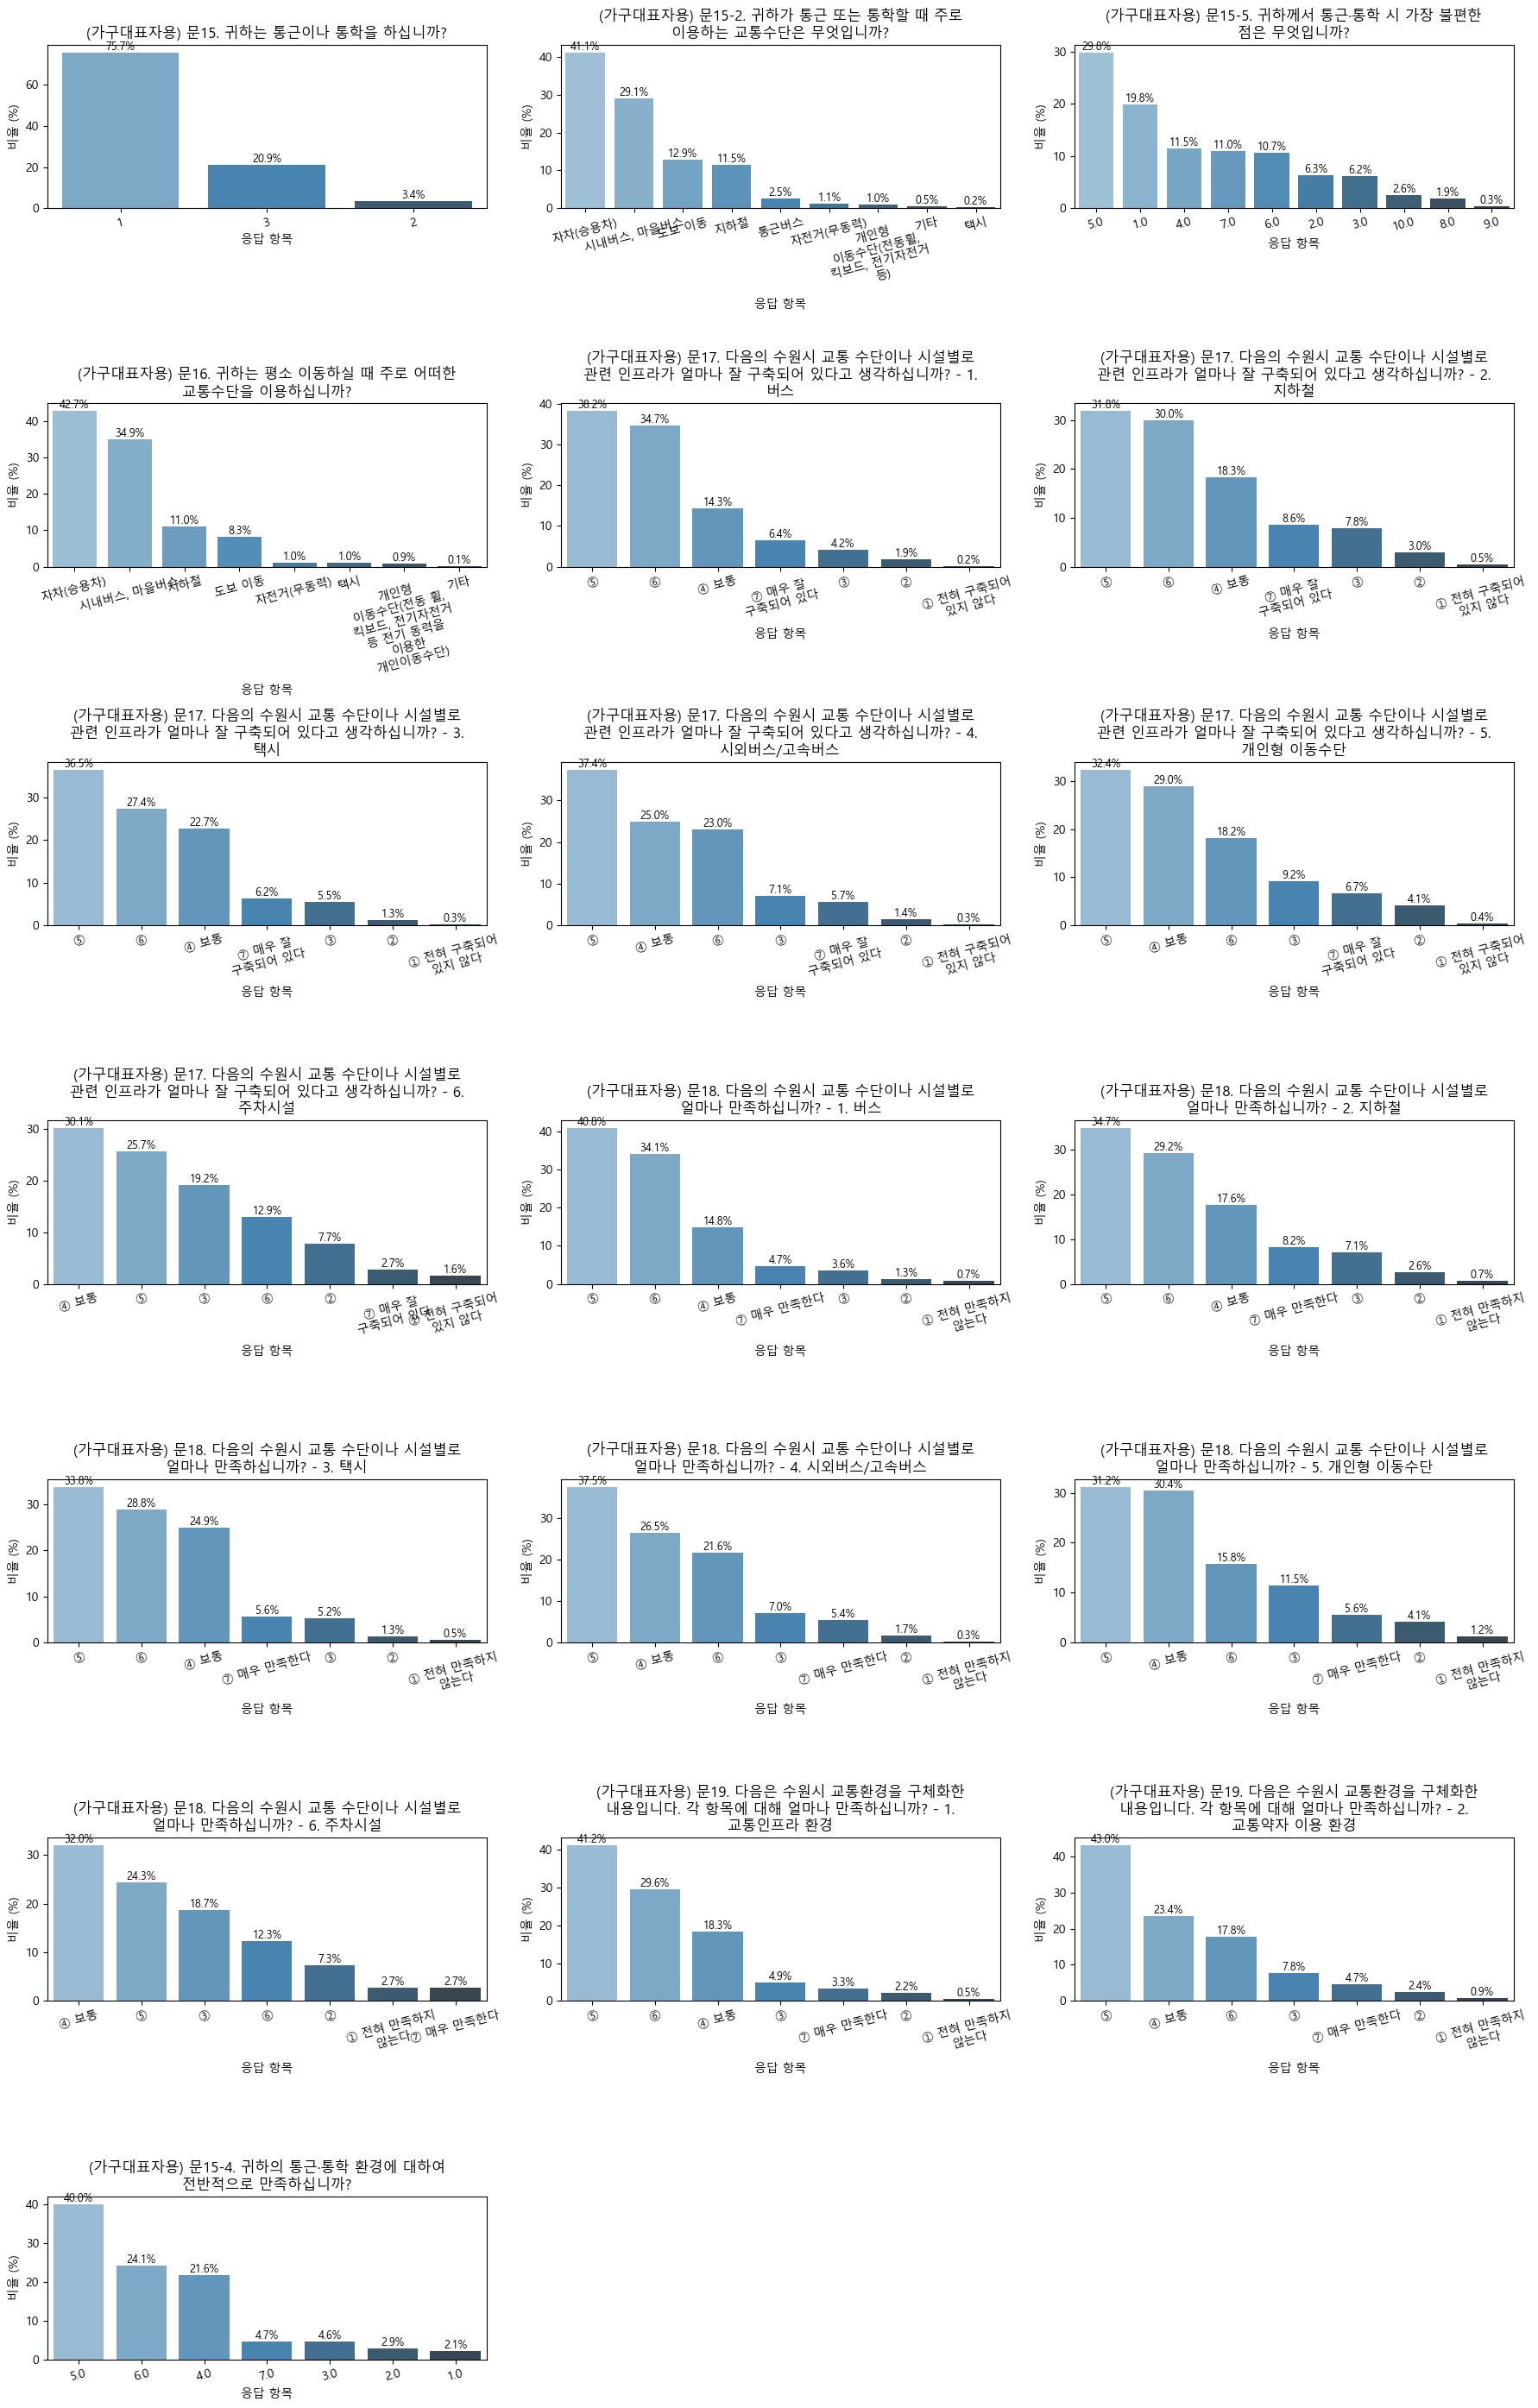

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import textwrap
import json

# -------------------- JSON 코드북 불러오기 --------------------
with open("combined_dict.json", "r", encoding="utf-8") as f:
    codebook = json.load(f)

# -------------------- 시각화 대상 교통 문항 리스트 --------------------
transport_codes = [
    "Q15", "Q15_2", "Q15_5", "Q16",
    "Q17a1", "Q17a2", "Q17a3", "Q17a4", "Q17a5", "Q17a6",
    "Q18a1", "Q18a2", "Q18a3", "Q18a4", "Q18a5", "Q18a6",
    "Q19a1", "Q19a2", "Q15_4"
]

# -------------------- 한글 폰트 설정 --------------------
plt.style.use('default')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# -------------------- 긴 항목 자동 줄바꿈 --------------------
def wrap_labels(labels, width=10):
    return ['\n'.join(textwrap.wrap(str(label), width)) for label in labels]

# -------------------- 시각화 함수 --------------------
def plot_all_distributions(df, question_codes, codebook):
    num_cols = len(question_codes)
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4 * num_rows))
    axes = axes.flatten()

    for i, qcode in enumerate(question_codes):
        if qcode not in df.columns:
            print(f"⚠️ {qcode} 항목 없음 → 건너뜀")
            continue

        col_data = df[qcode].dropna()
        if col_data.empty:
            print(f"[{qcode}] 응답 없음 → 건너뜀")
            continue

        value_counts = col_data.value_counts(normalize=True).sort_values(ascending=False)
        labels = value_counts.index
        wrapped_labels = wrap_labels(labels, width=10)
        percentages = (value_counts.values * 100).round(1)

        sns.barplot(
            x=wrapped_labels,
            y=percentages,
            hue=wrapped_labels,
            palette="Blues_d",
            legend=False,
            ax=axes[i]
        )

        # ✅ 문항명 추출: JSON에서 "문항명" 키 사용
        question_text = codebook.get(qcode, {}).get("문항명", f"{qcode}")

        axes[i].set_title('\n'.join(textwrap.wrap(question_text, width=35)), fontsize=12)
        axes[i].set_xlabel("응답 항목")
        axes[i].set_ylabel("비율 (%)")
        axes[i].tick_params(axis='x', labelrotation=15)

        # 막대 위에 비율 표시
        for j, p in enumerate(axes[i].patches):
            height = p.get_height()
            axes[i].annotate(f"{percentages[j]}%",
                             (p.get_x() + p.get_width() / 2, height),
                             ha='center', va='bottom', fontsize=9)

    # 남는 subplot 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# -------------------- 실행 --------------------
plot_all_distributions(df, transport_codes, codebook)

In [30]:
with open("combined_dict.json", "r", encoding="utf-8") as f:
    codebook = json.load(f)
    
# 문항 코드 → 문항명 매핑 딕셔너리 생성
column_rename_map = {}

for col in df.columns:
    if col in codebook and "문항명" in codebook[col]:
        question_name = codebook[col]["문항명"]
        column_rename_map[col] = question_name

# 컬럼명 변경
df_renamed = df.rename(columns=column_rename_map)

# 새 파일로 저장
df_renamed.to_csv("설문응답_문항명변경.csv", index=False, encoding='utf-8-sig')

print("✅ 저장 완료: 설문응답_문항명변경.csv")


✅ 저장 완료: 설문응답_문항명변경.csv


In [32]:
print(df_renamed.tail())

      (가구대표자용) 문15. 귀하는 통근이나 통학을 하십니까?  \
3052                                 1   
3053                                 1   
3054                                 1   
3055                                 1   
3056                                 1   

     (가구대표자용) 문15-2. 귀하가 통근 또는 통학할 때 주로 이용하는 교통수단은 무엇입니까?  \
3052                                         시내버스, 마을버스     
3053                                            자차(승용차)     
3054                                           자전거(무동력)     
3055                        개인형 이동수단(전동휠, 킥보드, 전기자전거 등)     
3056                                            자차(승용차)     

      (가구대표자용) 문15-5. 귀하께서 통근·통학 시 가장 불편한 점은 무엇입니까?  \
3052                                            1.0   
3053                                            4.0   
3054                                            9.0   
3055                                            4.0   
3056                                            7.0   

     (가구대표자용) 문16. 귀하는 평소 이동하실 때 주로 어떠한 교통수단을 이용하

,문항명,부정비율(%),응답수
0,(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까?...,28.8,3057
1,(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나...,28.5,3057
2,(가구대표자용) 문18. 다음의 수원시 교통 수단이나 시설별로 얼마나 만족하십니까?...,16.9,3057
3,(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나...,13.7,3057
4,(가구대표자용) 문17. 다음의 수원시 교통 수단이나 시설별로 관련 인프라가 얼마나...,11.4,3057


C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\3500449098.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="부정비율(%)", y="문항명",


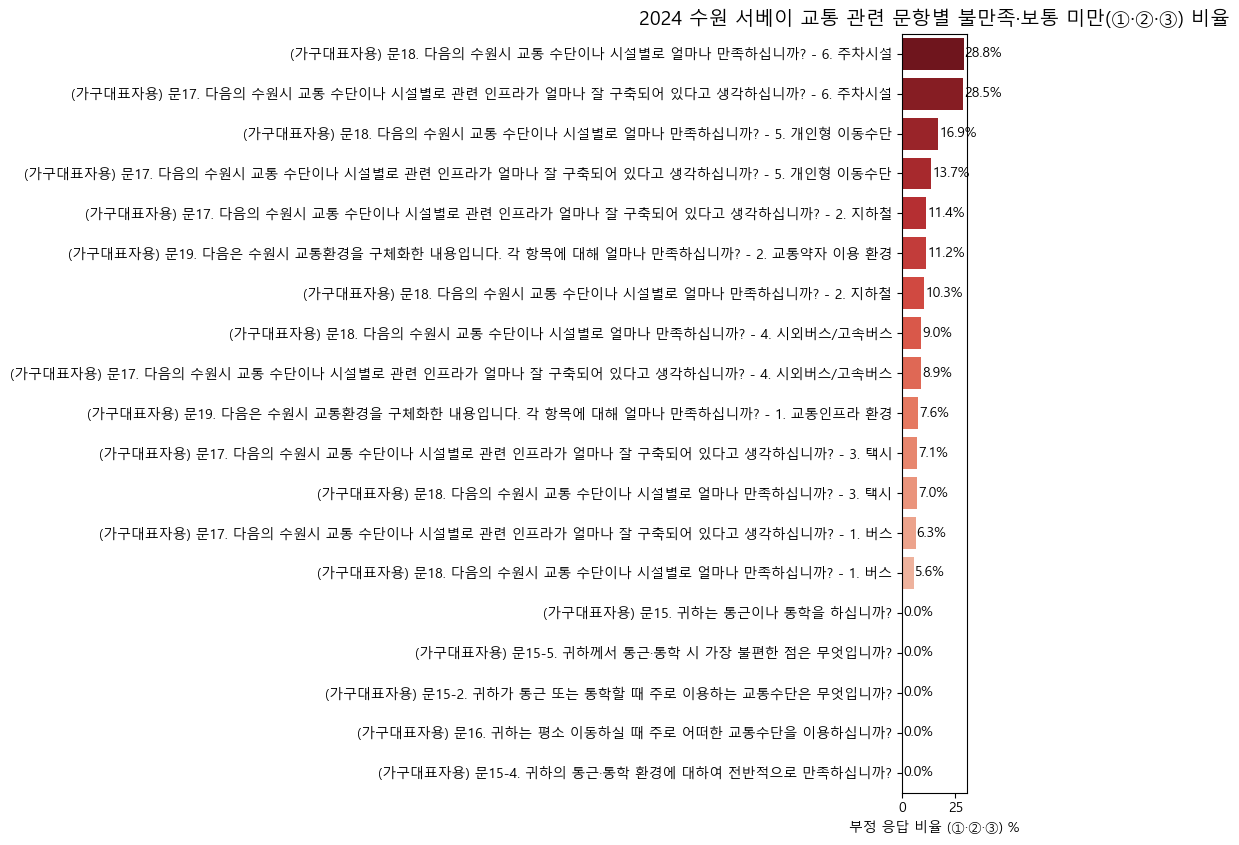

In [34]:
# --------------------------------------------------------------------
# 0. 준비 : 라이브러리 로드 & 경로 지정
# --------------------------------------------------------------------
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

csv_path   = "설문응답_문항명변경.csv"   # ← 앞에서 컬럼명을 문항명으로 바꿔 저장한 파일
low_regex  = re.compile(r"[①②③]")      # '①‧②‧③'이 들어간 응답 = 부정적(보통 미만)

# --------------------------------------------------------------------
# 1. 데이터 읽기
# --------------------------------------------------------------------
df = pd.read_csv(csv_path, encoding="utf-8-sig")

# 교통 관련 문항(문항명)만 추리기 ─ 필요하면 수정
transport_questions = [c for c in df.columns if c.startswith("(가구대표자용) 문15")
                       or c.startswith("(가구대표자용) 문16")
                       or c.startswith("(가구대표자용) 문17")
                       or c.startswith("(가구대표자용) 문18")
                       or c.startswith("(가구대표자용) 문19")]

# --------------------------------------------------------------------
# 2. 각 문항별 '①·②·③' 비율 계산
# --------------------------------------------------------------------
summary = []
for col in transport_questions:
    series = df[col].dropna().astype(str)
    total  = len(series)
    low_cnt = series.str.contains(low_regex).sum()
    pct = round(low_cnt / total * 100, 1) if total else 0.0
    summary.append({"문항명": col, "부정비율(%)": pct, "응답수": total})

summary_df = (pd.DataFrame(summary)
              .sort_values("부정비율(%)", ascending=False)
              .reset_index(drop=True))

# 확인용 표
display(summary_df.head())

# --------------------------------------------------------------------
# 3. 시각화 (내림차순 막대그래프)
# --------------------------------------------------------------------
plt.figure(figsize=(10, 0.45 * len(summary_df)))
sns.barplot(x="부정비율(%)", y="문항명",
            data=summary_df,
            palette="Reds_r")

plt.xlabel("부정 응답 비율 (①·②·③) %")
plt.ylabel("")
plt.title("2024 수원 서베이 교통 관련 문항별 불만족·보통 미만(①·②·③) 비율", fontsize=14)

# 막대 위에 값 표기
for i, v in enumerate(summary_df["부정비율(%)"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import json
from pathlib import Path

# ------------------------------------------------------------------
# 0. 경로 설정
# ------------------------------------------------------------------
excel_path   = Path("cmpt_data/1. 수원서베이/12_데이터공모전(공개데이터)/(HRC250604) 2024년 수원서베이 용역_공개용 데이터/(HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
codebook_path = Path("combined_dict.json")
output_csv    = Path("수원서베이_문항명_라벨치환.csv")

# ------------------------------------------------------------------
# 1. 원본 데이터 읽기
# ------------------------------------------------------------------
df_raw  = pd.read_excel(excel_path, header=None)
code_row = df_raw.iloc[1]                   # 두 번째 행: 문항 코드
df       = df_raw.iloc[2:].reset_index(drop=True)
df.columns = code_row                      # 컬럼명을 코드로 설정

# ------------------------------------------------------------------
# 2. 코드북 로드
# ------------------------------------------------------------------
with open(codebook_path, "r", encoding="utf-8") as f:
    codebook = json.load(f)

# ------------------------------------------------------------------
# 3. 응답값 매핑 함수 (이미 정의했더라도 재사용)
# ------------------------------------------------------------------
def map_response_codes(series: pd.Series, codebook_entry: dict) -> pd.Series:
    mapping = {}
    for code, value in codebook_entry.get("보기", {}).items():
        label = value.get("내용", value) if isinstance(value, dict) else value
        mapping[str(code)] = label
    return series.astype(str).map(mapping).fillna(series)

# ------------------------------------------------------------------
# 4. 컬럼명 변환 & 값 라벨링
# ------------------------------------------------------------------
rename_dict   = {}
used_names    = set()          # 중복 문항명 방지용
df_mapped     = df.copy()

for col in df.columns:
    if col not in codebook:
        # 코드북에 없는 컬럼은 그대로 둠
        continue
    
    # 4-1. 값 라벨 매핑
    df_mapped[col] = map_response_codes(df_mapped[col], codebook[col])
    
    # 4-2. 컬럼명 치환
    qname = codebook[col].get("문항명", col)
    
    # 중복 대비: 이미 같은 문항명이 있으면 코드명을 덧붙임
    if qname in used_names:
        qname = f"{qname} ({col})"
    used_names.add(qname)
    
    rename_dict[col] = qname

# 컬럼명 적용
df_mapped = df_mapped.rename(columns=rename_dict)

# ------------------------------------------------------------------
# 5. CSV 저장
# ------------------------------------------------------------------
df_mapped.to_csv(output_csv, index=False, encoding="utf-8-sig")
print(f"✅ 변환 완료 → '{output_csv}' 저장")

# 미리보기
display(df_mapped.head())

C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\2577032986.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\2577032986.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.astype(str).map(mapping).fillna(series)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12388\2577032986.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_obje

✅ 변환 완료 → '수원서베이_문항명_라벨치환.csv' 저장


1,응답자 PID,(가구용) 문0. 가구 정보 - 1. 거주 주택 유형,(가구용) 문0. 가구 정보 - 2. 1인 가구 여부,(가구용) 문0. 가구 정보 - 3. 맞벌이 여부(가구주 기준),(가구용) 문0. 응답자 성별,(가구용) 문0. 응답자 출생연도,(가구용) 문0. 총 가구원 수,(가구용) 문0. 가구원1 가구대표자(응답자)와의 관계,(가구용) 문0. 가구원1 가구대표자(응답자)와의 관계_기타,(가구용) 문0. 가구원1 성별,...,정책 관심도,수원시정 만족도,한 주간 삶의 질_평균(7점),영역별 행복 정도_평균(10점),환경 만족도_평균(7점),한 주간 삶의 질_평균(100점),영역별 행복 정도_평균(100점),환경 만족도_평균(100점),모수가중치,표본가중치
0,29715,1,1,3,1,1992,1,1,NaN,1,...,2,1,4.000000,5.6,4.6,50.000000,56,60.000000,241.000000,0.729643
1,51295,1,2,1,2,1981,4,2,NaN,1,...,2,3,4.857143,8.0,5.3,64.285714,80,71.666667,202.384615,0.612732
2,52982,1,2,2,1,1977,5,1,NaN,1,...,2,3,4.571429,5.6,5.1,59.523810,56,68.333333,212.000000,0.641843
3,54416,1,2,2,1,1975,4,2,NaN,2,...,2,3,3.285714,7.2,4.1,38.095238,72,51.666667,318.416667,0.964027
4,64244,1,2,3,1,1991,3,6,NaN,1,...,2,3,4.000000,6.6,5.1,50.000000,66,68.333333,390.285714,1.181615


In [4]:
import pandas as pd
import numpy as np

# 데이터 불러오기
file_path = './수원서베이_문항명_라벨치환.csv'
df = pd.read_csv(file_path, low_memory=False)

# Likert‑척도로 판단할 문항 키워드와 부정 키워드
likert_keywords = [
    '만족', '정도', '평가', '생각', '필요', '얼마나', '중요', '원하', '바람',
    '의견', '노력', '우선', '필요성', '긍정', '부정', '안전', '행복', '건강',
    '환경', '공원', '교통', '문화', '시정', '정책', '경제', '삶', '신뢰',
    '기대', '개선', '심각', '걱정', '우려', '불만족', '불편', '부족', '문제', '우울'
]
negative_keywords = [
    '불만족','불편','미흡','부족','반대','감소','필요하지','필요없','불필요',
    '불가능','문제','걱정','나쁘','부정','싫','어렵','힘들','못하','불편하',
    '좋지 않','원하지 않','없다','심각','위험','우려','우울','외로웠다','불안'
]

candidate_cols = []
# Likert‑척도 후보 문항 선별
for col in df.columns:
    if col in ('응답자 PID','모수가중치','표본가중치'):
        continue
    # 키워드 포함 여부 확인
    if any(kw in col for kw in likert_keywords):
        series = pd.to_numeric(df[col], errors='coerce')
        unique_vals = series.dropna().unique()
        # 응답값이 4~7개 범위에 있으면 Likert‑척도로 간주
        if 4 <= len(unique_vals) <= 7:
            if 1 <= min(unique_vals) and max(unique_vals) <= 7:
                candidate_cols.append(col)

results = []
for col in candidate_cols:
    series = pd.to_numeric(df[col], errors='coerce')
    unique_vals = sorted(series.dropna().unique())
    if not unique_vals:
        continue
    max_val = max(unique_vals)

    # 응답 방향(정/역)을 문항명에서 추정
    orientation = 'positive'
    if any(kw in col for kw in negative_keywords):
        orientation = 'reversed'

    # 부정 응답 범위 결정
    if orientation == 'positive':
        if max_val >= 7:
            neg_vals = [1,2,3]       # 7점 척도
        elif max_val == 6:
            neg_vals = [1,2]         # 6점 척도
        elif max_val == 5:
            neg_vals = [1,2]         # 5점 척도
        elif max_val == 4:
            neg_vals = [1]           # 4점 척도
    else:
        if max_val >= 7:
            neg_vals = [5,6,7]
        elif max_val == 6:
            neg_vals = [5,6]
        elif max_val == 5:
            neg_vals = [4,5]
        elif max_val == 4:
            neg_vals = [4]

    valid_count = series.notna().sum()
    neg_count = series.isin(neg_vals).sum()
    neg_ratio = neg_count / valid_count if valid_count > 0 else np.nan
    results.append({
        '문항': col,
        'orientation': orientation,
        'scale_max': max_val,
        'neg_count': neg_count,
        'valid_count': valid_count,
        'neg_ratio': neg_ratio
    })

result_df = pd.DataFrame(results).sort_values(by='neg_ratio', ascending=False)
result_df.to_csv('./output/negative_ratio_final_results.csv', index=False)
print(result_df[['문항','orientation','neg_ratio']].head(10))


                                                   문항 orientation  neg_ratio
92  (가구대표자용) 문48-2. 귀하는 가족, 친구, 이웃과 얼마나 자주 비대면(카카오...    positive   0.846254
39        (가구대표자용) 문28. 귀하는 도시공원 및 녹지를 얼마나 자주 이용하시나요?    positive   0.802094
5   (가구용) 문5-2. 반려동물을 키우는데 있어 수원시의 지원이 가장 필요한 부분은 ...    positive   0.755218
44  (가구대표자용) 문32-2. 귀하가 사는 곳 근처(걸어서 5분 거리 정도)의 녹지(...    positive   0.730880
41  (가구대표자용) 문30. 귀하가 도시공원 및 녹지에서 현재 주로 하는 활동과 향후 ...    positive   0.700360
24  (가구대표자용) 문6. 귀하는 저출생 대응을 위해 가장 필요한 정책이 무엇이라고 생...    positive   0.680406
46  (가구대표자용) 문33. 다음 항목별로 우리 시의 환경문제가 각각 얼마나 심각하다고...    reversed   0.679424
96  (가구대표자용) 문49. 귀하는 다음 각 사람 또는 기관을 얼마나 신뢰하십니까? -...    positive   0.668956
47  (가구대표자용) 문33. 다음 항목별로 우리 시의 환경문제가 각각 얼마나 심각하다고...    reversed   0.654890
91  (가구대표자용) 문48-1. 귀하는 가족, 친구, 이웃과 얼마나 자주 만나서 소통하...    positive   0.648348


그래프가 ./output/negative_response_ratio_plot.png에 저장되었습니다.


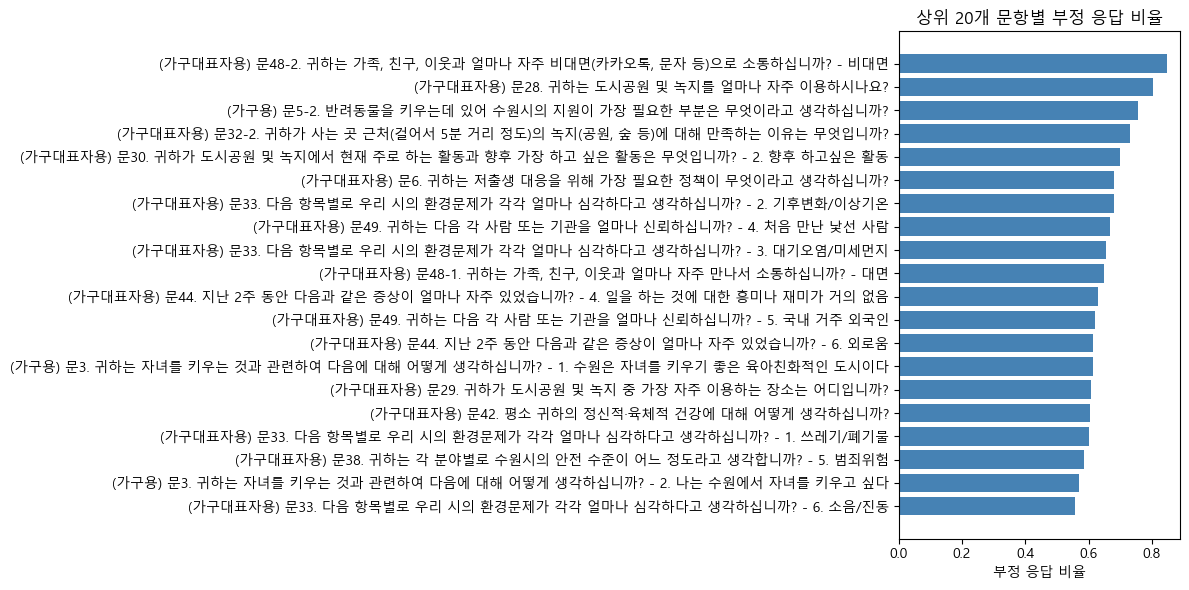

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 부정 응답 비율 결과 불러오기
result_path = './output/negative_ratio_final_results.csv'
results = pd.read_csv(result_path)

# 부정 응답 비율이 높은 상위 N개 문항 선택
n_top = 20
results_sorted = results.sort_values('neg_ratio', ascending=False).head(n_top)

# 그래프 그리기
plt.figure(figsize=(12, 6))
# CJK 문자(한글 등)를 지원하는 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.barh(results_sorted['문항'][::-1], results_sorted['neg_ratio'][::-1], color='steelblue')
plt.xlabel('부정 응답 비율')
plt.title(f'상위 {n_top}개 문항별 부정 응답 비율')
plt.tight_layout()

# 그림 저장
plot_path = './output/negative_response_ratio_plot.png'
plt.savefig(plot_path)
print(f'그래프가 {plot_path}에 저장되었습니다.')

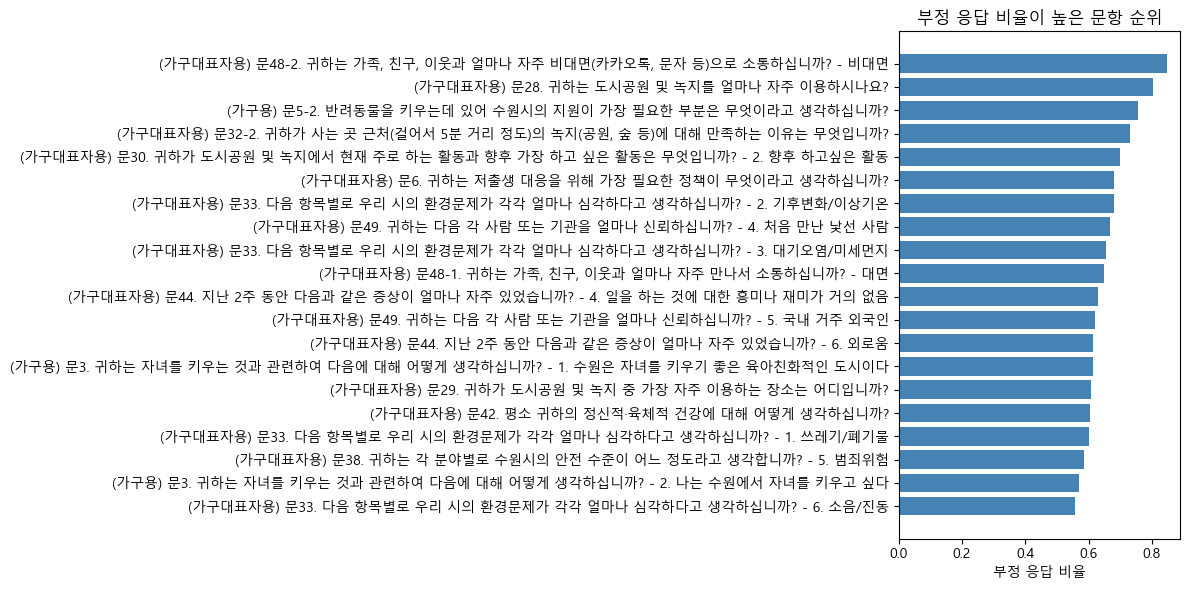

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 읽기
file_path = './수원서베이_문항명_라벨치환.csv'
df = pd.read_csv(file_path, low_memory=False)

# 숫자 기호 매핑 (①, ②, … → 1, 2, …)
circled_map = {'①':1, '②':2, '③':3, '④':4, '⑤':5, '⑥':6, '⑦':7,
               '⑧':8, '⑨':9, '⑩':10, '⑪':11, '⑫':12}

# Likert 관련 키워드, 부정 방향 키워드
likert_keywords = [
    '만족','정도','평가','생각','필요','얼마나','중요','원하','바람','의견',
    '노력','우선','필요성','긍정','부정','안전','행복','건강','환경','공원',
    '교통','문화','시정','정책','경제','삶','신뢰','기대','개선','심각',
    '걱정','우려','불만족','불편','부족','문제','우울'
]
negative_keywords = [
    '불만족','불편','미흡','부족','반대','감소','필요하지','필요없','불필요',
    '불가능','문제','걱정','나쁘','부정','싫','어렵','힘들','못하','불편하',
    '좋지 않','원하지 않','없다','심각','위험','우려','우울','외로웠다','불안'
]

# 값 변환 함수: 숫자 기호와 숫자 문자열을 정수로 변환
def parse_value(val):
    if pd.isnull(val):
        return np.nan
    if isinstance(val, str):
        v = val.strip()
        if v in circled_map:
            return circled_map[v]
        try:
            f = float(v)
            if f.is_integer():
                return int(f)
        except ValueError:
            pass
        if v.isdigit():
            return int(v)
        return np.nan
    if isinstance(val, (int,float)):
        if np.isnan(val):
            return np.nan
        if float(val).is_integer():
            return int(val)
    return np.nan

# Likert 후보 문항 추출
candidate_cols = []
for col in df.columns:
    if col in ('응답자 PID','모수가중치','표본가중치'):
        continue
    if not any(kw in col for kw in likert_keywords):
        continue
    parsed = df[col].apply(parse_value)
    unique_vals = parsed.dropna().unique()
    # 4~7개 답변 값이 1~7 사이에 있으면 Likert‑척도라고 가정
    if 4 <= len(unique_vals) <= 7 and 1 <= np.nanmin(unique_vals) <= np.nanmax(unique_vals) <= 7:
        candidate_cols.append(col)

# 부정 응답 비율 계산
results = []
for col in candidate_cols:
    series = df[col].apply(parse_value)
    unique_vals = sorted(series.dropna().unique())
    if not unique_vals:
        continue
    max_val = max(unique_vals)
    # 문항명에 부정 키워드 포함 시 역채점
    orientation = 'reversed' if any(kw in col for kw in negative_keywords) else 'positive'
    if orientation == 'positive':
        if max_val >= 7:
            neg_vals = [1,2,3]  # 7점 척도
        elif max_val in [5,6]:
            neg_vals = [1,2]    # 5점/6점 척도
        elif max_val == 4:
            neg_vals = [1]      # 4점 척도
        else:
            # 그 외 척도는 하위 1/3을 부정으로 설정
            thr = 1 + (max_val - 1) / 3
            neg_vals = [v for v in unique_vals if v <= thr]
    else:
        if max_val >= 7:
            neg_vals = [5,6,7]
        elif max_val == 6:
            neg_vals = [5,6]
        elif max_val == 5:
            neg_vals = [4,5]
        elif max_val == 4:
            neg_vals = [4]
        else:
            thr = 1 + 2 * (max_val - 1) / 3
            neg_vals = [v for v in unique_vals if v >= thr]

    valid_count = series.notna().sum()
    neg_count = series.isin(neg_vals).sum()
    neg_ratio = neg_count / valid_count if valid_count > 0 else np.nan
    results.append({'문항':col, 'neg_ratio':neg_ratio, 'orientation':orientation})

result_df = pd.DataFrame(results).sort_values(by='neg_ratio', ascending=False)

# 상위 20개 문항을 시각화
top_n = 20
top_df = result_df.head(top_n)

plt.figure(figsize=(12, 6))
# 한글 표시를 위해 CJK 폰트 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.barh(top_df['문항'][::-1], top_df['neg_ratio'][::-1], color='steelblue')
plt.xlabel('부정 응답 비율')
plt.title('부정 응답 비율이 높은 문항 순위')
plt.tight_layout()
plt.show()

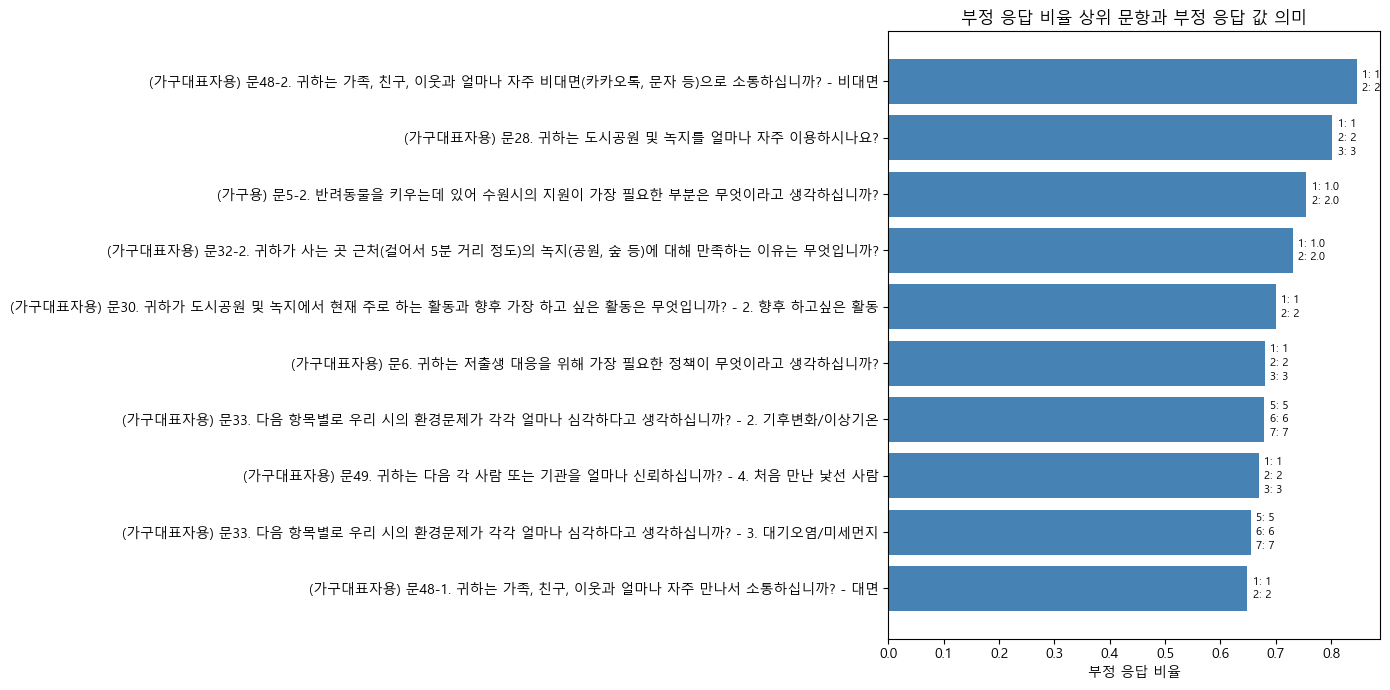

In [12]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import font_manager

# =========================
# 사용자 설정
# =========================
CSV_PATH = './수원서베이_문항명_라벨치환.csv'
TOP_N = 10  # 시각화할 상위 문항 개수
# 로컬 TTF 경로가 있다면 여기에 추가(예: r'C:\Windows\Fonts\malgun.ttf')
LOCAL_FONT_PATH = None

# =========================
# 환경/경고 설정
# =========================
pd.set_option('future.no_silent_downcasting', True)

# =========================
# 한글 폰트 설정 (윈도우/맥/리눅스 대응)
# =========================
def set_korean_font(local_font_path=None):
    # 1) 로컬 ttf 경로가 명시되면 그 폰트를 등록
    if local_font_path:
        try:
            font_manager.fontManager.addfont(local_font_path)
            # 파일명에서 family를 정확히 알기 어렵기 때문에 파일 등록 후 family 추정
            # 사용자 편의상 바로 이 경로를 family로 지정 시도
            plt.rcParams['font.family'] = font_manager.FontProperties(fname=local_font_path).get_name()
            return
        except Exception:
            pass

    # 2) 시스템에 존재할 가능성이 높은 후보들
    candidates = [
        'Malgun Gothic',         # Windows
        'AppleGothic',           # macOS
        'NanumGothic',           # 나눔고딕
        'Noto Sans CJK KR',      # Noto CJK KR
        'Noto Sans CJK JP',      # Noto CJK JP (한글 포함)
        'Noto Sans KR',
        'Noto Sans',
        'DejaVu Sans'            # 최후의 보루(한글 일부가 깨질 수 있음)
    ]
    # 설치된 폰트 목록
    installed = set([f.name for f in font_manager.fontManager.ttflist])
    for fam in candidates:
        if fam in installed:
            plt.rcParams['font.family'] = fam
            return
    # 어떤 것도 못 찾은 경우(그래도 진행)
    plt.rcParams['font.family'] = 'DejaVu Sans'

set_korean_font(LOCAL_FONT_PATH)

# =========================
# 데이터 로드
# =========================
df = pd.read_csv(CSV_PATH, low_memory=False)

# =========================
# 숫자 기호/접두 숫자 파싱 설정
# =========================
circled_map = {
    '①':1,'②':2,'③':3,'④':4,'⑤':5,'⑥':6,'⑦':7,
    '⑧':8,'⑨':9,'⑩':10,'⑪':11,'⑫':12
}
circled_pattern = re.compile(r'^([①②③④⑤⑥⑦⑧⑨⑩⑪⑫])')  # 응답 문자열 맨 앞 원형 숫자
numeric_prefix_pattern = re.compile(r'^(\d+)')              # "1. 매우 …" 형식 등

def parse_value(val):
    """
    응답 문자열에서 원형 숫자/접두 숫자를 추출하여 정수로 반환.
    숫자만 있는 문자열/숫자형도 처리.
    """
    if pd.isnull(val):
        return np.nan
    if isinstance(val, str):
        v = val.strip()
        # ①②… 로 시작하면 매핑
        m = circled_pattern.match(v)
        if m:
            return circled_map.get(m.group(1), np.nan)
        # 숫자로 시작(예: '1. 매우 …')
        m = numeric_prefix_pattern.match(v)
        if m:
            try:
                return int(m.group(1))
            except Exception:
                return np.nan
        # 숫자 문자열만 있는 경우
        try:
            f = float(v)
            if f.is_integer():
                return int(f)
        except ValueError:
            pass
        if v.isdigit():
            return int(v)
        return np.nan
    if isinstance(val, (int, float)):
        if pd.isna(val):
            return np.nan
        if float(val).is_integer():
            return int(val)
    return np.nan

# =========================
# Likert 후보 문항 식별
# =========================
likert_keywords = [
    '만족','정도','평가','생각','필요','얼마나','중요','원하','바람','의견',
    '노력','우선','필요성','긍정','부정','안전','행복','건강','환경','공원',
    '교통','문화','시정','정책','경제','삶','신뢰','기대','개선','심각',
    '걱정','우려','불만족','불편','부족','문제','우울'
]
negative_keywords = [
    '불만족','불편','미흡','부족','반대','감소','필요하지','필요없','불필요',
    '불가능','문제','걱정','나쁘','부정','싫','어렵','힘들','못하','불편하',
    '좋지 않','원하지 않','없다','심각','위험','우려','우울','외로웠다','불안'
]

candidate_cols = []
for col in df.columns:
    if col in ('응답자 PID','모수가중치','표본가중치'):
        continue
    if not any(kw in col for kw in likert_keywords):
        continue
    parsed = df[col].apply(parse_value)
    unique_vals = parsed.dropna().unique()
    # 1~7 범위 내 값이 4~7개 존재 → Likert로 가정
    if len(unique_vals) >= 4:
        try:
            if 1 <= np.nanmin(unique_vals) and np.nanmax(unique_vals) <= 7 and len(unique_vals) <= 7:
                candidate_cols.append(col)
        except ValueError:
            # 모두 NaN인 경우 등
            pass

# =========================
# 문항별 부정 응답 비율 계산
# =========================
def neg_value_range(max_val, orientation):
    """
    척도 최대값과 방향(positive/reversed)에 따른 부정 코드 집합을 반환
    """
    if orientation == 'positive':
        if max_val >= 7:
            return [1,2,3]      # 7점
        elif max_val in (5,6):
            return [1,2]        # 5/6점
        elif max_val == 4:
            return [1]          # 4점
        else:
            # 그 외 척도: 하위 1/3
            thr = 1 + (max_val - 1) / 3
            return list(range(1, int(np.floor(thr))+1))
    else:
        if max_val >= 7:
            return [5,6,7]
        elif max_val == 6:
            return [5,6]
        elif max_val == 5:
            return [4,5]
        elif max_val == 4:
            return [4]
        else:
            # 그 외 척도: 상위 1/3
            thr = 1 + 2*(max_val - 1) / 3
            return [v for v in range(1, int(max_val)+1) if v >= thr]

rows = []
for col in candidate_cols:
    series = df[col].apply(parse_value)
    uniq = sorted(series.dropna().unique())
    if not uniq:
        continue
    max_val = max(uniq)
    orientation = 'reversed' if any(kw in col for kw in negative_keywords) else 'positive'
    neg_vals = neg_value_range(max_val, orientation)

    valid = series.notna().sum()
    neg = series.isin(neg_vals).sum()
    neg_ratio = neg / valid if valid > 0 else np.nan
    rows.append({
        '문항': col,
        'neg_ratio': neg_ratio,
        'valid_n': valid,
        'orientation': orientation,
        'scale_max': max_val,
        'neg_vals': neg_vals
    })

result_df = pd.DataFrame(rows).sort_values('neg_ratio', ascending=False)
top_df = result_df.head(TOP_N).copy()

# =========================
# 부정 코드 → 가장 긴 레이블(설명)을 붙이기
# (데이터에 설명이 없으면 숫자만 표기됨)
# =========================
def longest_label_for_code(col, code):
    vals = df[col].dropna().unique()
    cand = [v for v in vals if parse_value(v) == code]
    if not cand:
        return str(code)
    # 가장 긴 문자열을 택해 설명이 있는 경우를 우선 반영
    return max(cand, key=lambda x: len(str(x)))

label_info = {}
for _, r in top_df.iterrows():
    col = r['문항']
    labels = {}
    for code in sorted(set(r['neg_vals'])):
        labels[code] = longest_label_for_code(col, code)
    label_info[col] = labels

top_df['neg_label'] = top_df['문항'].apply(
    lambda x: '\n'.join([f"{k}: {label_info[x][k]}" for k in sorted(label_info[x].keys())])
)

# =========================
# 시각화
# =========================
plt.figure(figsize=(14, 7))
bars = plt.barh(top_df['문항'][::-1], top_df['neg_ratio'][::-1], color='steelblue')
plt.xlabel('부정 응답 비율')
plt.title('부정 응답 비율 상위 문항과 부정 응답 값 의미')

# 막대 오른쪽에 부정 코드/라벨 주석
for i, (ratio, label) in enumerate(zip(top_df['neg_ratio'][::-1], top_df['neg_label'][::-1])):
    plt.text(float(ratio) + 0.01, i, label, va='center', fontsize=8)

plt.tight_layout()
plt.show()

# =========================
# 참고: 계산 결과 테이블 확인이 필요하면 아래 주석 해제
# =========================
# display_cols = ['문항','neg_ratio','valid_n','orientation','scale_max','neg_vals']
# print(top_df[display_cols].to_string(index=False))

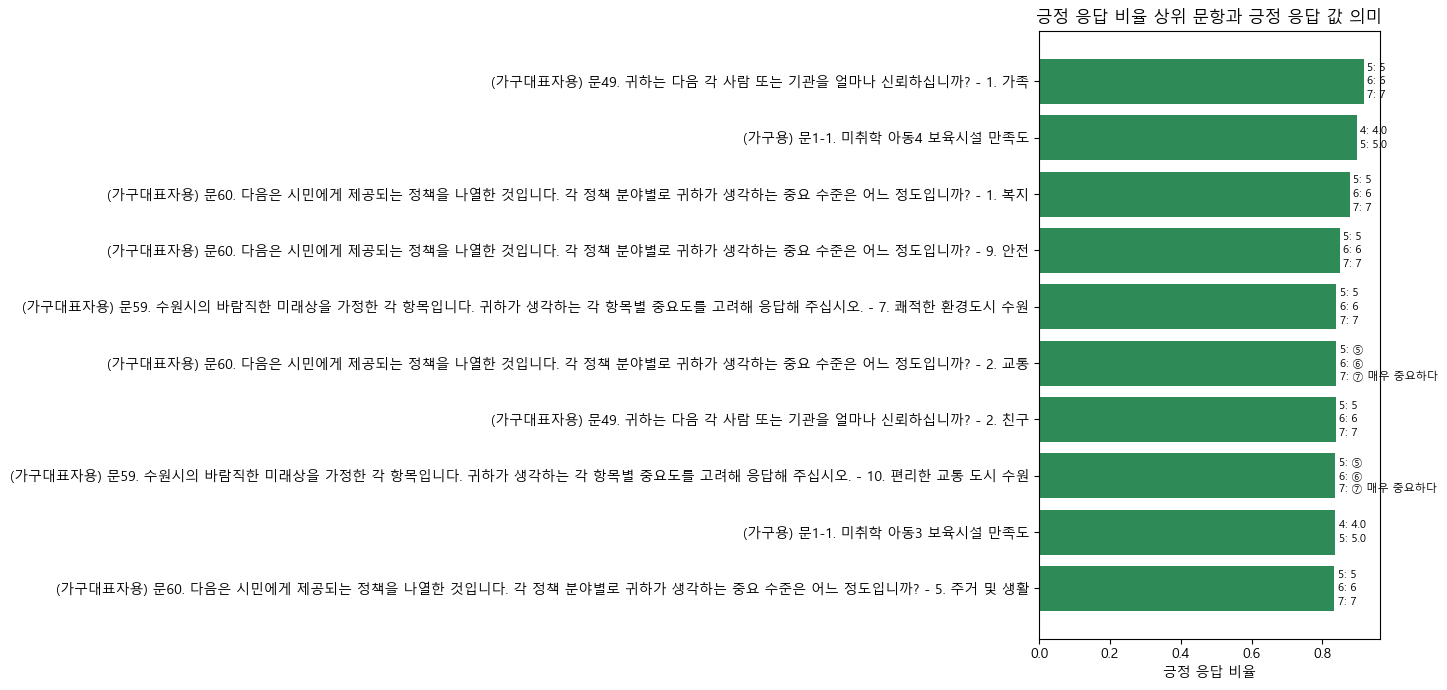

In [13]:
# =========================
# (추가) 문항별 긍정 응답 비율 계산 및 시각화
# =========================
def pos_value_range(max_val, orientation):
    """
    척도 최대값과 방향(positive/reversed)에 따른 긍정 코드 집합을 반환
    - 중립값은 포함하지 않음 (예: 5점의 3, 7점의 4 등)
    """
    if orientation == 'positive':
        if max_val >= 7:
            return [5, 6, 7]         # 7점: 긍정 상단 3개
        elif max_val == 6:
            return [5, 6]            # 6점: 상단 2개
        elif max_val == 5:
            return [4, 5]            # 5점: 상단 2개
        elif max_val == 4:
            return [3, 4]            # 4점: 상단 2개
        else:
            # 그 외 척도: 상위 1/3
            thr = 1 + 2 * (max_val - 1) / 3
            return [v for v in range(1, int(max_val) + 1) if v >= np.ceil(thr)]
    else:  # reversed: 높은 값이 부정이므로 낮은 값이 긍정
        if max_val >= 7:
            return [1, 2, 3]
        elif max_val == 6:
            return [1, 2]
        elif max_val == 5:
            return [1, 2]
        elif max_val == 4:
            return [1]               # 4점: 하단 1개만 긍정(2,3은 중립)
        else:
            # 그 외 척도: 하위 1/3
            thr = 1 + (max_val - 1) / 3
            return list(range(1, int(np.floor(thr)) + 1))

rows_pos = []
for col in candidate_cols:
    series = df[col].apply(parse_value)
    uniq = sorted(series.dropna().unique())
    if not uniq:
        continue
    max_val = max(uniq)
    orientation = 'reversed' if any(kw in col for kw in negative_keywords) else 'positive'
    pos_vals = pos_value_range(max_val, orientation)

    valid = series.notna().sum()
    pos = series.isin(pos_vals).sum()
    pos_ratio = pos / valid if valid > 0 else np.nan
    rows_pos.append({
        '문항': col,
        'pos_ratio': pos_ratio,
        'valid_n': valid,
        'orientation': orientation,
        'scale_max': max_val,
        'pos_vals': pos_vals
    })

result_df_pos = pd.DataFrame(rows_pos).sort_values('pos_ratio', ascending=False)
top_df_pos = result_df_pos.head(TOP_N).copy()

# 긍정 코드 → 가장 긴 레이블(설명) 붙이기
def longest_pos_label_for_code(col, code):
    vals = df[col].dropna().unique()
    cand = [v for v in vals if parse_value(v) == code]
    if not cand:
        return str(code)
    return max(cand, key=lambda x: len(str(x)))

pos_label_info = {}
for _, r in top_df_pos.iterrows():
    col = r['문항']
    labels = {}
    for code in sorted(set(r['pos_vals'])):
        labels[code] = longest_pos_label_for_code(col, code)
    pos_label_info[col] = labels

top_df_pos['pos_label'] = top_df_pos['문항'].apply(
    lambda x: '\n'.join([f"{k}: {pos_label_info[x][k]}" for k in sorted(pos_label_info[x].keys())])
)

# 시각화
plt.figure(figsize=(14, 7))
bars = plt.barh(top_df_pos['문항'][::-1], top_df_pos['pos_ratio'][::-1], color='seagreen')
plt.xlabel('긍정 응답 비율')
plt.title('긍정 응답 비율 상위 문항과 긍정 응답 값 의미')

# 막대 오른쪽에 긍정 코드/라벨 주석
for i, (ratio, label) in enumerate(zip(top_df_pos['pos_ratio'][::-1], top_df_pos['pos_label'][::-1])):
    # 좌표가 1.0을 넘지 않도록 약간 안쪽에 배치
    x = min(float(ratio) + 0.01, 0.99)
    plt.text(x, i, label, va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 참고: 결과 테이블 확인이 필요하면 주석 해제
# display_cols_pos = ['문항','pos_ratio','valid_n','orientation','scale_max','pos_vals']
# print(top_df_pos[display_cols_pos].to_string(index=False))


findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
findfont: Font family 'MalgunGothic' not found.
C:\Users\kco19\AppData\Local\Temp\ipykernel_19840\574000892.py:128: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kco19\AppData\Local\Temp\ipykernel_19840\574000892.py:128: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kco19\AppData\Local\Temp\ipykernel_19840\574000892.py:128: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\kco19\AppData\Local\Temp\ipykernel_

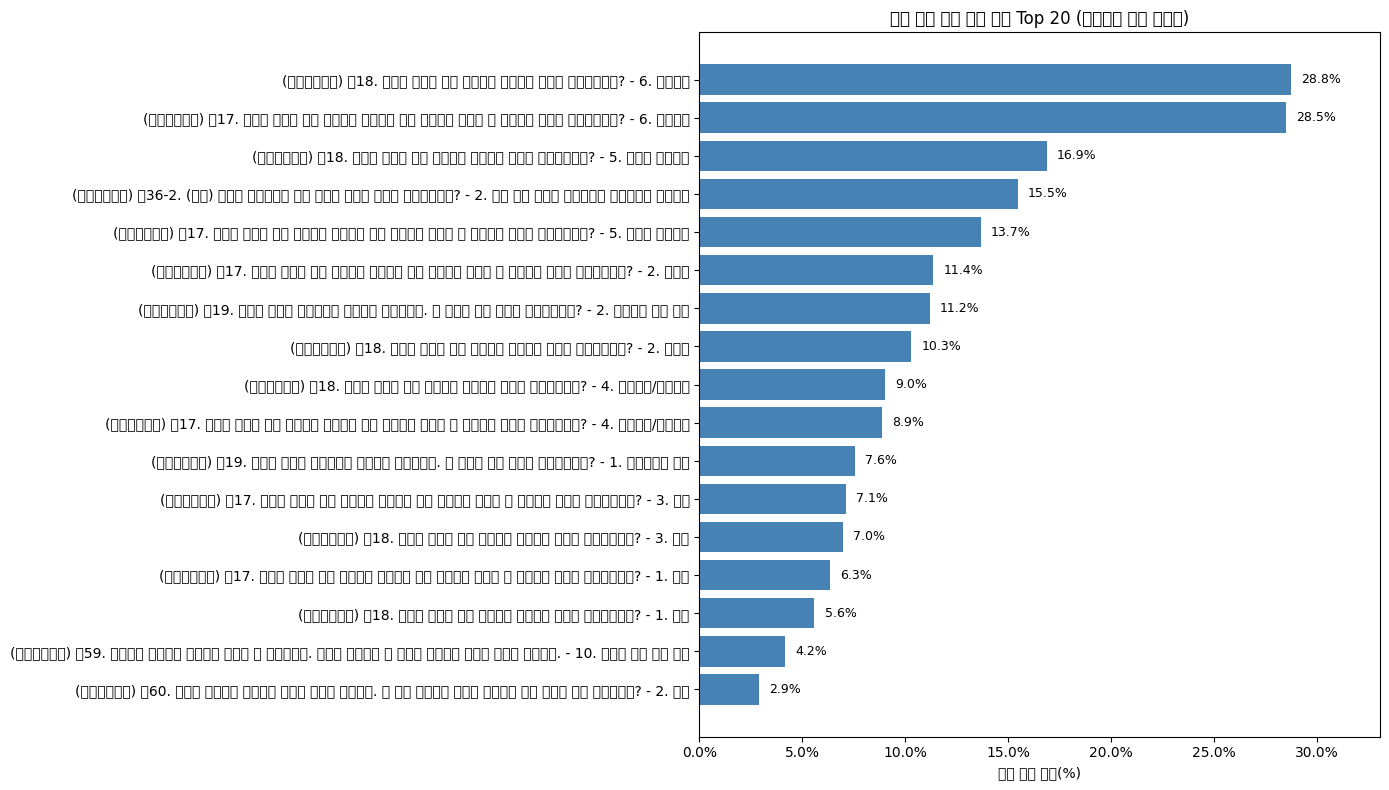

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from matplotlib import font_manager
from matplotlib.ticker import PercentFormatter

# =========================
# 사용자 설정
# =========================
CSV_PATH = './수원서베이_문항명_라벨치환.csv'
TOP_N = 20  # 상위 문항 개수

# 0~10 문항 중 제외할 열 이름의 키워드
EXCLUDE_010_KEYWORDS = ['본인의 계층', '자신의 계층', '사회계층', '계층(본인)']

# =========================
# 폰트 설정: 나눔고딕
# =========================
plt.rcParams['font.family'] = 'Malgun Gothic'

# =========================
# 숫자기호 파싱
# =========================
circled_map = {
    '⓪':0,'①':1,'②':2,'③':3,'④':4,'⑤':5,'⑥':6,'⑦':7,'⑧':8,'⑨':9,'⑩':10
}
circled_pattern = re.compile(r'^([⓪①②③④⑤⑥⑦⑧⑨⑩])')

def parse_value(val):
    """동그라미 숫자를 정수로 변환"""
    if pd.isnull(val):
        return np.nan
    if isinstance(val, str):
        v = val.strip()
        m = circled_pattern.match(v)
        if m:
            return circled_map.get(m.group(1), np.nan)
        return np.nan
    return np.nan

# =========================
# 척도 판별
# =========================
def detect_scale(vals):
    """파싱된 값으로 척도를 판별"""
    if len(vals) == 0:
        return None
    mn, mx = np.nanmin(vals), np.nanmax(vals)
    if 0 <= mn <= 1 and mx == 10:
        return '0-10'
    if mn >= 1 and mx == 7:
        return '1-7'
    if mn >= 1 and mx == 5:
        return '1-5'
    return None

def should_exclude_010(col_name):
    return any(kw in str(col_name) for kw in EXCLUDE_010_KEYWORDS)

# =========================
# 데이터 로드 및 분석
# =========================
df = pd.read_csv(CSV_PATH, low_memory=False)
rows = []

# 대상 컬럼: 값에 동그라미 숫자가 포함된 경우만
circled_chars = set(circled_map.keys())
target_cols = [
    col for col in df.columns
    if col not in ('응답자 PID','모수가중치','표본가중치') 
    and df[col].astype(str).str[0].isin(circled_chars).any()
]

for col in target_cols:
    parsed = df[col].apply(parse_value)
    scale = detect_scale(parsed.dropna().unique())

    # 0-10인데 제외 키워드 포함 시 스킵
    if scale == '0-10' and should_exclude_010(col):
        continue

    # 부정 코드 규칙
    if scale == '1-7':
        neg_codes = {1, 2, 3}
    elif scale == '1-5':
        neg_codes = {1, 2}
    elif scale == '0-10':
        neg_codes = {0, 1, 2, 3, 4}
    else:
        continue

    valid_n = parsed.notna().sum()
    if valid_n == 0:
        continue

    neg_ratio = parsed.isin(neg_codes).sum() / valid_n

    rows.append({
        '문항': col,
        'neg_ratio': neg_ratio,
        'valid_n': valid_n,
        'scale': scale,
        'neg_codes': sorted(list(neg_codes))
    })

result_df = pd.DataFrame(rows).sort_values('neg_ratio', ascending=False)
top_df = result_df.head(TOP_N).copy()

# =========================
# 시각화 (% 축)
# =========================
plt.figure(figsize=(14, 8))
y_labels = top_df['문항'][::-1]
x_vals = top_df['neg_ratio'][::-1]

plt.barh(y_labels, x_vals, color='steelblue')
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1.0))
plt.xlabel('부정 응답 비율(%)')
plt.title('부정 응답 비율 상위 문항 Top 20 (숫자기호 포함 문항만)')

# 퍼센트 라벨
for i, (y, v) in enumerate(zip(y_labels, x_vals)):
    plt.text(v + 0.005, i, f"{v*100:.1f}%", va='center', fontsize=9)

plt.xlim(0, min(1.0, max(0.15, x_vals.max() * 1.15)))
plt.tight_layout()
plt.show()